In [3]:
# Importing libraries 
import numpy as np 
import pandas as pd 
from scipy.stats import mode 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix 

%matplotlib inline

In [5]:
# Reading the train.csv by removing the 
# last column since it's an empty column 
DATA_PATH = "dataset/train.csv"
data = pd.read_csv(DATA_PATH).dropna(axis = 1) 
data.head(2)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [8]:
data.shape

(4920, 133)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [15]:
data.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [20]:
data['prognosis'].value_counts().rename_axis('illness').reset_index(name='counts')

,illness,counts
0,Fungal infection,120
1,Hepatitis C,120
2,Hepatitis E,120
3,Alcoholic hepatitis,120
4,Tuberculosis,120
5,Common Cold,120
6,Pneumonia,120
7,Dimorphic hemmorhoids(piles),120
8,Heart attack,120
9,Varicose veins,120


In [21]:
disease_counts = data['prognosis'].value_counts().rename_axis('illness').reset_index(name='counts')

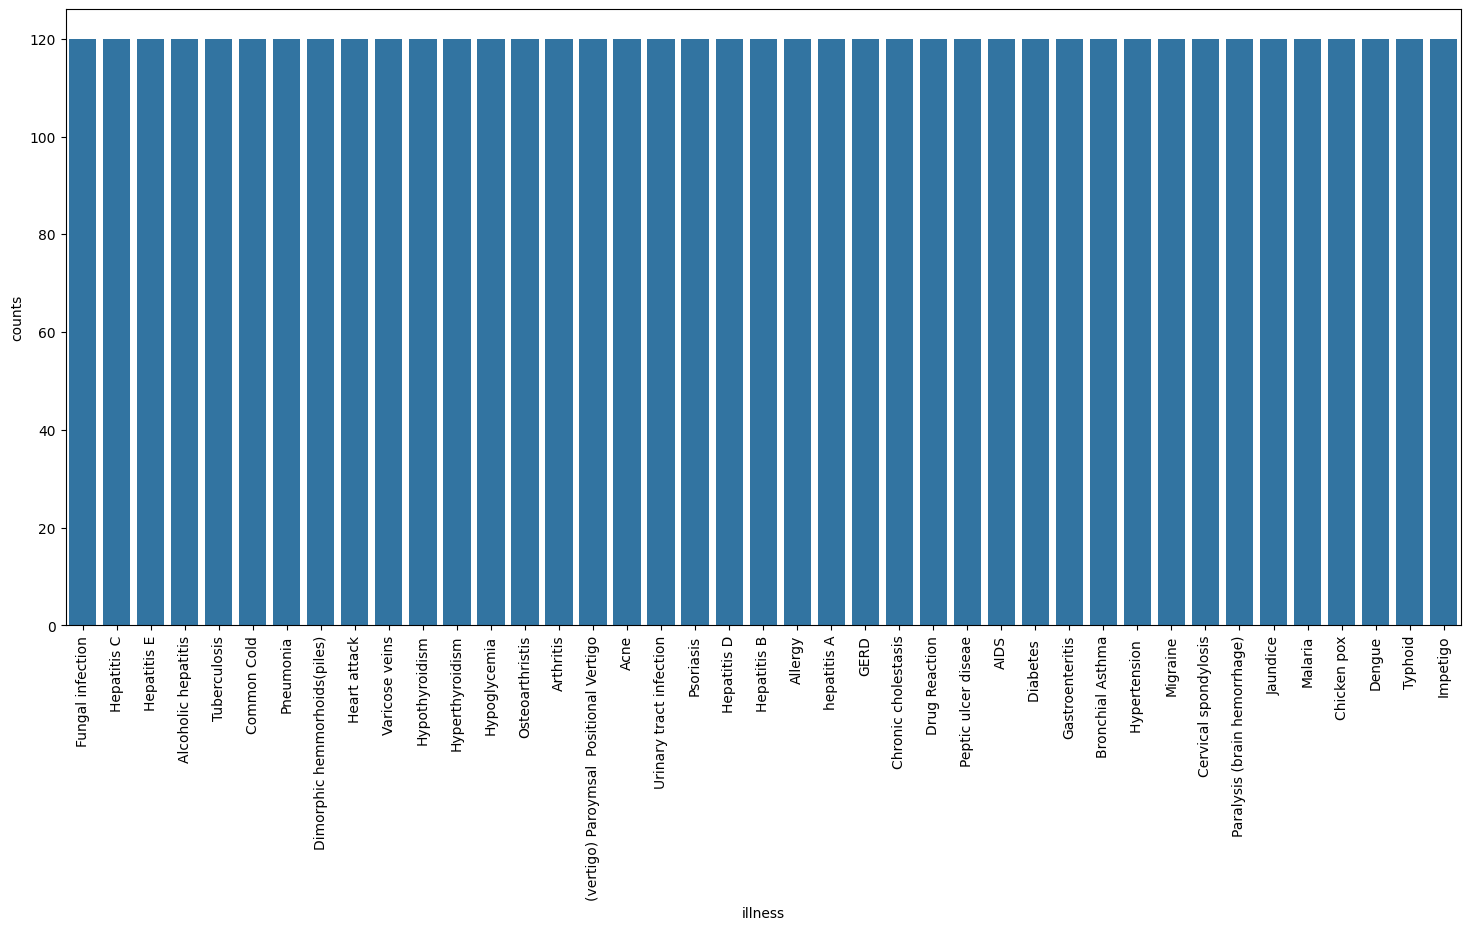

In [22]:
plt.figure(figsize= (18, 8))
sns.barplot(x='illness', y='counts', data=disease_counts)
plt.xticks(rotation=90)
plt.show()

In [23]:
# Encoding the target value into numerical 
# value using LabelEncoder 
encoder = LabelEncoder()
data['prognosis'] = encoder.fit_transform(data['prognosis'])

In [26]:
data['prognosis'].value_counts().sort_index()

prognosis
0     120
1     120
2     120
3     120
4     120
5     120
6     120
7     120
8     120
9     120
10    120
11    120
12    120
13    120
14    120
15    120
16    120
17    120
18    120
19    120
20    120
21    120
22    120
23    120
24    120
25    120
26    120
27    120
28    120
29    120
30    120
31    120
32    120
33    120
34    120
35    120
36    120
37    120
38    120
39    120
40    120
Name: count, dtype: int64

In [27]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"{X_train.shape = }, {y_train.shape = }")

print(f"{X_test.shape = }, {y_test.shape = }")

X_train.shape = (3936, 132), y_train.shape = (3936,)
X_test.shape = (984, 132), y_test.shape = (984,)


In [30]:
# Initializing Models 
models = {
    'SVC': SVC(),
    'Gaussian NB': GaussianNB(),
    'Random Forest': RandomForestClassifier(random_state=18)
}

In [31]:
# Defining scoring metric for k-fold cross validation 
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

In [32]:
# Producing cross validation score for the models
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv=10, n_jobs=-1, scoring=cv_scoring)

    print("=="*30)
    print(model_name)
    print(f"{scores = }")
    print(f"Mean Score: {np.mean(scores)}")

SVC
scores = array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
Mean Score: 1.0
Gaussian NB
scores = array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
Mean Score: 1.0
Random Forest
scores = array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
Mean Score: 1.0


In [36]:
# Training and testing SVM Classifier 
def testing(estimator, X_train, y_train, X_test, y_test):
    
    estimator.fit(X_train, y_train)
    preds = estimator.predict(X_test)

    print(f"Accuracy on train data:\n{accuracy_score(y_train, estimator.predict(X_train))*100:2f}")
    print(f"Accuracy on test data:\n{accuracy_score(y_test, preds)*100:2f}")

    cf_matrix = confusion_matrix(y_test, preds)
    plt.figure(figsize=(8, 5))
    sns.heatmap(cf_matrix, annot=True)
    plt.title
    plt.show()

Checking for SVC........
Accuracy on train data:
100.000000
Accuracy on test data:
100.000000


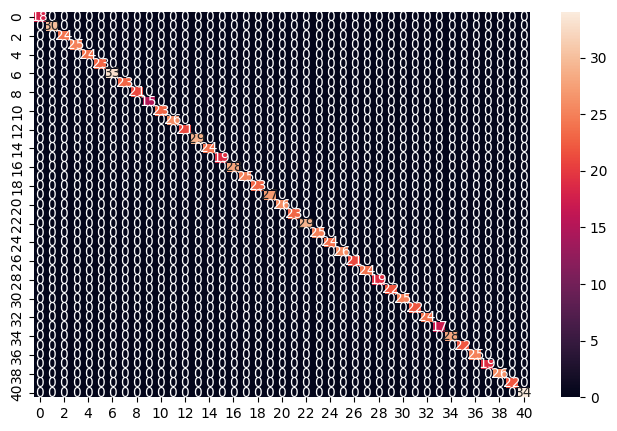

Checking for Gaussian NB........
Accuracy on train data:
100.000000
Accuracy on test data:
100.000000


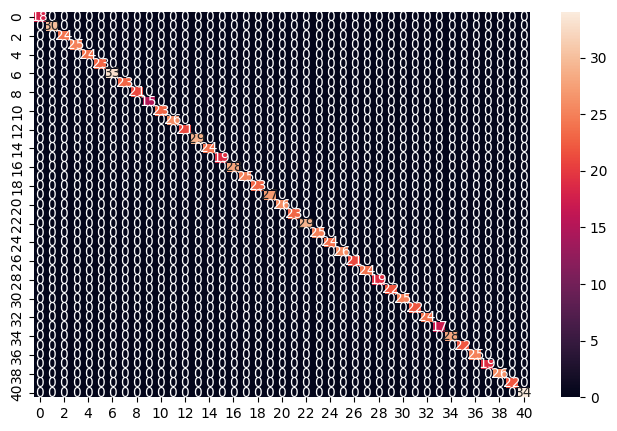

Checking for Random Forest........
Accuracy on train data:
100.000000
Accuracy on test data:
100.000000


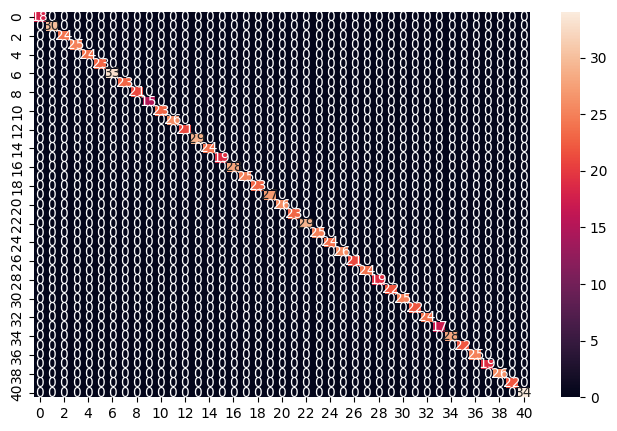

In [37]:
# Producing cross validation score for the models
for model_name in models:
    model = models[model_name]
    print(f"Checking for {model_name}........")
    print("=="*30)
    scores = testing(model, X_train, y_train, X_test, y_test)

In [45]:
mode([4,5,6,6])[0][0]

C:\Users\vishpand\AppData\Local\Temp\ipykernel_24528\3322649903.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode([4,5,6,6])[0][0]


6

In [50]:
def ensemble_predictions(*preds):
    """
    Combines predictions from multiple classifiers by taking the mode for each instance.
    
    Args:
    *preds: Variable number of lists or arrays containing predictions from different classifiers.
    
    Returns:
    list: Final predictions obtained by taking the mode for each instance.
    """

    # zipped predictions
    zipped_preds = zip(*preds)

    # calculate mode for each group of predictions
    final_preds = [mode(prediction_group, keepdims=True)[0][0] for prediction_group in zipped_preds]

    return final_preds

In [51]:
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)

final_svm_model.fit(X_train, y_train)
final_nb_model.fit(X_train, y_train)
final_rf_model.fit(X_train, y_train)

svm_preds = final_svm_model.predict(X_test)
nb_preds = final_nb_model.predict(X_test)
rf_preds = final_rf_model.predict(X_test)

final_preds = ensemble_predictions(svm_preds, nb_preds, rf_preds)
print(final_preds)

[2, 2, 24, 1, 9, 23, 25, 5, 19, 30, 38, 12, 21, 35, 3, 3, 13, 22, 12, 7, 6, 40, 19, 6, 4, 20, 34, 30, 26, 30, 9, 19, 17, 22, 39, 30, 28, 14, 34, 38, 20, 0, 23, 12, 28, 17, 25, 19, 35, 35, 18, 36, 39, 4, 24, 20, 37, 10, 38, 33, 25, 24, 36, 18, 0, 26, 32, 1, 0, 13, 15, 6, 2, 22, 26, 9, 27, 27, 10, 30, 16, 27, 16, 14, 19, 1, 28, 17, 0, 11, 26, 29, 21, 3, 36, 17, 29, 18, 34, 11, 23, 6, 3, 4, 33, 39, 16, 30, 22, 1, 21, 39, 18, 25, 12, 14, 26, 28, 25, 3, 7, 35, 32, 8, 5, 34, 17, 24, 35, 31, 11, 7, 7, 7, 9, 2, 19, 34, 13, 37, 33, 18, 35, 19, 21, 31, 14, 39, 36, 3, 12, 31, 33, 37, 23, 37, 25, 21, 3, 4, 6, 28, 1, 18, 40, 37, 29, 6, 27, 24, 40, 21, 40, 17, 34, 27, 1, 40, 10, 8, 29, 1, 4, 40, 30, 37, 12, 19, 11, 38, 37, 2, 39, 34, 22, 8, 15, 7, 19, 31, 17, 40, 39, 11, 15, 0, 16, 4, 9, 8, 19, 31, 18, 13, 17, 28, 29, 18, 9, 21, 11, 3, 3, 23, 32, 40, 8, 17, 26, 35, 5, 13, 37, 34, 35, 14, 31, 6, 12, 5, 10, 20, 4, 39, 32, 36, 36, 9, 32, 18, 19, 22, 13, 11, 27, 34, 13, 10, 10, 1, 18, 10, 10, 14, 0, 26,

In [52]:
len(final_preds)

984

In [56]:
np.array(final_preds).shape

(984,)

In [60]:
symptoms = X.columns.values

# Creating a symptom index dictionary to encode the 
# input symptoms into numerical form 
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index

In [63]:
data_dict = {
    "symptom_index" : symptom_index,
    "predictions_classes" : encoder.classes_
}

In [65]:
data_dict['predictions_classes']

array(['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne',
       'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma',
       'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis',
       'Common Cold', 'Dengue', 'Diabetes ',
       'Dimorphic hemmorhoids(piles)', 'Drug Reaction',
       'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Hypertension ', 'Hyperthyroidism', 'Hypoglycemia',
       'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine',
       'Osteoarthristis', 'Paralysis (brain hemorrhage)',
       'Peptic ulcer diseae', 'Pneumonia', 'Psoriasis', 'Tuberculosis',
       'Typhoid', 'Urinary tract infection', 'Varicose veins',
       'hepatitis A'], dtype=object)

In [79]:
# Defining the Function 
# Input: string containing symptoms separated by commas 
# Output: Generated predictions by models 
def predictDisease(symptoms):
    symptoms = symptoms.split(",")

    # creating input data for the models
    input_data = [0] * len(data_dict['symptom_index'])
    # print(f"{input_data = }")
    for symptom in symptoms:
        index = data_dict['symptom_index'][symptom]
        input_data[index] = 1

    # reshaping the input data and converting it 
    # into suitable format for model predictions 
    input_data = np.array(input_data).reshape(1,-1) 
      
    # generating individual outputs 
    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]] 
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]] 
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]] 
      
    # making final prediction by taking mode of all predictions 
    final_prediction = mode([rf_prediction, nb_prediction, svm_prediction], keepdims=True)[0][0] 
    predictions = { 
        "rf_model_prediction": rf_prediction, 
        "naive_bayes_prediction": nb_prediction, 
        "svm_model_prediction": svm_prediction, 
        "final_prediction":final_prediction 
    } 
    return predictions

In [80]:
import warnings


with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    # Testing the function 
    print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions"))

{'rf_model_prediction': 'Fungal infection', 'naive_bayes_prediction': 'Fungal infection', 'svm_model_prediction': 'Fungal infection', 'final_prediction': 'Fungal infection'}
